In [58]:
import math
import networkx as nx
import matplotlib.pyplot as plt


In [59]:
L=nx.read_gml('polbooks.gml',relabel=True)
L

In [60]:
print "Nodes:", L.number_of_nodes()
print "Edges:", L.number_of_edges()

Nodes: 105
Edges: 441


#### With 77 nodes and 254 edges, lets draw a network grapgh using spring layout 

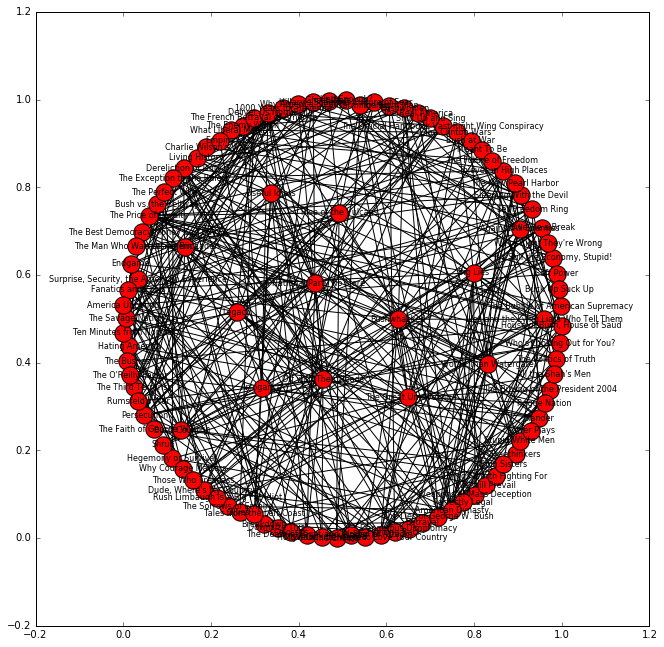

In [61]:
%matplotlib inline
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
pos = nx.spring_layout(L,scale=1.0,k=5*default_distance_between_nodes)
nx.draw_networkx(L,pos, node_size=300, font_size=8)


In [62]:
def sorted_map(map):
    ms=sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [63]:
#Compute Degree Of Centrality
d=nx.degree(L)
ds = sorted_map(deg)
ds[0:9]


[(u'A National Party No More', 25),
 (u'Off with Their Heads', 25),
 (u'Bushwhacked', 23),
 (u'Losing Bin Laden', 23),
 (u'American Dynasty', 22),
 (u'Big Lies', 21),
 (u'The Great Unraveling', 21),
 (u'The Price of Loyalty', 20),
 (u'Arrogance', 18)]

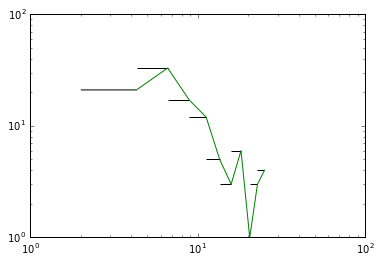

In [64]:
%matplotlib inline
h=plt.hist(d.values(),10)
plt.loglog(h[1][1:],h[0])

In [65]:
#Return a new graph object that contains thenetwrok with pendant and islocated nodes removed
def trim_degrees(L,degree=1):
    L2=L.copy()
    d=nx.degree(L2)
    for n in L2.nodes():
            if d[n]<=degree: L2.remove_node(n)
    return L2

In [66]:
core=trim_degrees(L)
len(core)

105

In [67]:
core2=trim_degrees(L,degree=2)
len(core2)

104

In [68]:
core3=trim_degrees(L,degree=3)
len(core3)

98

In [69]:
core4=trim_degrees(L,degree=4)
len(core4)

84

In [70]:
core5=trim_degrees(L,degree=5)
len(core5)

62

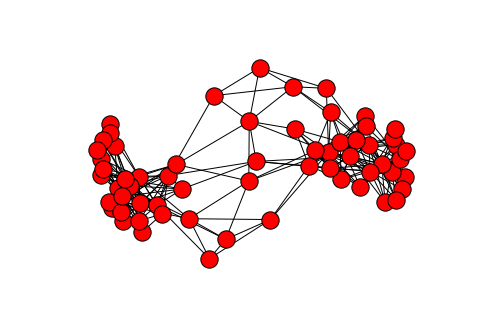

In [71]:
nx.draw(core5)

In [72]:
#Use the core5 grapgh network as a trimmed and optimized dataset to calculate the closeness centrality
c=nx.closeness_centrality(core5)
cs=sorted_map(c)
cs[:10]

[(u'Ghost Wars', 0.4357142857142857),
 (u'Rise of the Vulcans', 0.4357142857142857),
 (u'The Bushes', 0.4357142857142857),
 (u'Bush Country', 0.4295774647887324),
 (u'The Price of Loyalty', 0.4295774647887324),
 (u"Rumsfeld's War", 0.41496598639455784),
 (u'American Dynasty', 0.4066666666666667),
 (u'House of Bush, House of Saud', 0.4066666666666667),
 (u'Plan of Attack', 0.4066666666666667),
 (u'Sleeping With the Devil', 0.40131578947368424)]

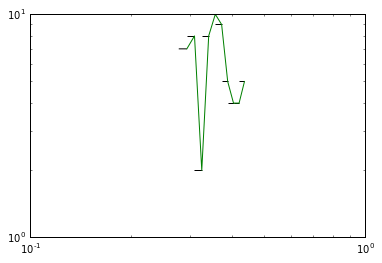

In [73]:
%matplotlib inline
h=plt.hist(c.values(),10)
plt.loglog(h[1][1:],h[0])

In [74]:
b = nx.betweenness_centrality(L)
bs = sorted_map(b)
bs[:10]


[(u'The Price of Loyalty', 0.13947827864287202),
 (u'The Bushes', 0.10364920953531939),
 (u'Bush Country', 0.0983949072276391),
 (u'Off with Their Heads', 0.09526168061799924),
 (u'American Dynasty', 0.09093422527408514),
 (u'Plan of Attack', 0.08030200829197108),
 (u'Losing Bin Laden', 0.07609290805120639),
 (u'Rise of the Vulcans', 0.07527175636235366),
 (u'A National Party No More', 0.0749076042480461),
 (u'Ghost Wars', 0.06872446488084949)]

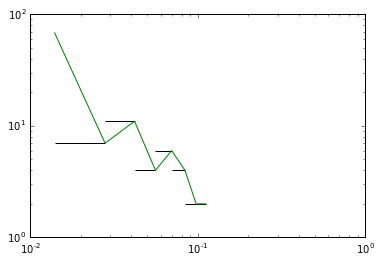

In [75]:
%matplotlib inline
h=plt.hist(b.values(),10)
plt.loglog(h[1][1:],h[0])

In [76]:
names1=[x[0] for x in ds[:10]]
names2=[x[0] for x in cs[:10]]
names3=[x[0] for x in bs[:10]]

In [77]:
names=list(set(names1)|set(names2)|set(names3))

In [78]:
table=[[name,d[name],c[name],b[name]] for name in names]

In [79]:
table

[[u'Off with Their Heads', 25, 0.37888198757763975, 0.09526168061799924],
 [u'The Price of Loyalty', 20, 0.4295774647887324, 0.13947827864287202],
 [u'Arrogance', 18, 0.35260115606936415, 0.02773067602170457],
 [u'American Dynasty', 22, 0.4066666666666667, 0.09093422527408514],
 [u'Big Lies', 21, 0.3696969696969697, 0.043197926647700245],
 [u'Ghost Wars', 8, 0.4357142857142857, 0.06872446488084949],
 [u'The Bushes', 8, 0.4357142857142857, 0.10364920953531939],
 [u'Deliver Us from Evil', 18, 0.3446327683615819, 0.04623512504605777],
 [u'Plan of Attack', 13, 0.4066666666666667, 0.08030200829197108],
 [u'Bush Country', 16, 0.4295774647887324, 0.0983949072276391],
 [u'A National Party No More', 25, 0.3836477987421384, 0.0749076042480461],
 [u'Bushwhacked', 23, 0.3719512195121951, 0.05789950024330003],
 [u'Sleeping With the Devil', 8, 0.40131578947368424, 0.06292846885423589],
 [u"Rumsfeld's War", 9, 0.41496598639455784, 0.058842720843820556],
 [u'The Great Unraveling', 21, 0.36969696969696